## Case Study: Sales Performance Analysis for a Retail Store

**Scenario**
You are a data analyst hired by a retail chain to analyze their sales performance over the past year. The management has provided a dataset but mentioned that some data might be missing or inconsistent. Your task is to clean, analyze, and visualize the data to provide actionable insights.

**Objectives:**
To help the retail store:
1. Understand its sales trends and profitability across regions, categories, and customer segments.
2. Address the impact of missing data on analysis and recommendations
3. Provide actionable suggestions to improve sales and profitability

**Business Questions:**
1. What are the overall sales and profit trends for the year?
2. How do sales and profit vary across regions, categories, and customer segments?
3. Which products and categories are underperforming and why?
4. Is there a correlation between discounts and profit?
5. Data-Driven recommendation

**Tasks:**
1. Data Cleaning
   - Identify Missing Values
   - Handle Missing Data
   - Justify your chosen method
2. Exploratory Data Analysis (EDA): considering the Business question
3. Insights and Recommendations
4. Create a concise presentation summarizing your findings, visualizations, and recommendations
5. Write a 1–2 page report summarizing your methodology, key insights, and actionable recommendations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('retail_sales.csv')
data.head()

,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Discount,Quantity,Customer Segment
0,7d9b253a,01-01-2023,East,Furniture,Laptops,786.00,-3.60,10.0,4,Consumer
1,0284b91b,02-01-2023,West,Clothing,Laptops,361.29,227.11,20.0,2,Small Business
2,acb9ec0e,03-01-2023,North,Electronics,Laptops,418.01,186.54,5.0,4,Consumer
3,7e9be348,04-01-2023,East,Electronics,Chairs,554.12,-45.00,20.0,4,Corporate
4,e275c7d4,05-01-2023,East,Electronics,Laptops,832.23,-83.98,5.0,4,Consumer


**Cleaned the data by removing the sub-category column from data cause it got some missing values and we dont require the sub-category column for our objective**
**There some missing values in sales and discount columns, filled with median of those respective columns in empty cells to make the data full**

In [149]:
data.describe()

,Sales,Profit,Discount,Quantity
count,980.000000,1000.000000,979.000000,1000.000000
mean,511.177041,57.247300,15.306435,2.462000
std,289.203582,141.771213,7.017220,1.104435
min,10.190000,-199.780000,5.000000,1.000000
25%,249.097500,-60.407500,10.000000,2.000000
50%,531.485000,60.670000,15.000000,2.000000
75%,756.697500,181.475000,20.000000,3.000000
max,999.720000,299.770000,25.000000,4.000000


In [151]:
data.drop_duplicates()

,Order ID,Order Date,Region,Category,Sub-Category,Sales,Profit,Discount,Quantity,Customer Segment
0,7d9b253a,01-01-2023,East,Furniture,Laptops,786.00,-3.60,10.0,4,Consumer
1,0284b91b,02-01-2023,West,Clothing,Laptops,361.29,227.11,20.0,2,Small Business
2,acb9ec0e,03-01-2023,North,Electronics,Laptops,418.01,186.54,5.0,4,Consumer
3,7e9be348,04-01-2023,East,Electronics,Chairs,554.12,-45.00,20.0,4,Corporate
4,e275c7d4,05-01-2023,East,Electronics,Laptops,832.23,-83.98,5.0,4,Consumer
...,...,...,...,...,...,...,...,...,...,...
995,34bb50cf,22-09-2025,North,Furniture,Chairs,361.49,-76.88,20.0,1,Consumer
996,23942d47,23-09-2025,North,Furniture,T-Shirts,701.33,11.77,15.0,3,Corporate
997,00c4b772,24-09-2025,West,Furniture,T-Shirts,401.25,196.79,5.0,1,Small Business
998,fe81e769,25-09-2025,West,Electronics,T-Shirts,953.37,-184.11,5.0,4,Consumer


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Region            1000 non-null   object 
 3   Category          1000 non-null   object 
 4   Sub-Category      980 non-null    object 
 5   Sales             980 non-null    float64
 6   Profit            1000 non-null   float64
 7   Discount          979 non-null    float64
 8   Quantity          1000 non-null   int64  
 9   Customer Segment  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [14]:
data_cleaned = data.drop(['Sub-Category'], axis = 1)
data_cleaned.head()
data_cleaned.value_counts('Category')

Category
Electronics    341
Furniture      331
Clothing       328
Name: count, dtype: int64

In [157]:
data_cleaned.describe()

,Sales,Profit,Discount,Quantity
count,980.000000,1000.000000,979.000000,1000.000000
mean,511.177041,57.247300,15.306435,2.462000
std,289.203582,141.771213,7.017220,1.104435
min,10.190000,-199.780000,5.000000,1.000000
25%,249.097500,-60.407500,10.000000,2.000000
50%,531.485000,60.670000,15.000000,2.000000
75%,756.697500,181.475000,20.000000,3.000000
max,999.720000,299.770000,25.000000,4.000000


In [159]:
data_cleaned['Sales'].fillna(data_cleaned['Sales'].median(), inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12016\1035430601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Sales'].fillna(data_cleaned['Sales'].median(), inplace = True)


In [161]:
data_cleaned['Discount'].fillna(data_cleaned['Discount'].mode()[0], inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12016\2308197360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Discount'].fillna(data_cleaned['Discount'].mode()[0], inplace = True)


In [163]:
data_cleaned.describe()

,Sales,Profit,Discount,Quantity
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,511.583200,57.247300,15.405000,2.462000
std,286.308146,141.771213,6.975646,1.104435
min,10.190000,-199.780000,5.000000,1.000000
25%,261.627500,-60.407500,10.000000,2.000000
50%,531.485000,60.670000,15.000000,2.000000
75%,752.125000,181.475000,20.000000,3.000000
max,999.720000,299.770000,25.000000,4.000000


**Categories percentage**

In [38]:
Category_percentages = data_cleaned['Category'].value_counts(normalize=True) * 100
formatted_percentages = Category_percentages.apply(lambda x: f"{x:.2f}")
print(formatted_percentages)
formatted_percentages = formatted_percentages.astype(float)

Category
Electronics    34.10
Furniture      33.10
Clothing       32.80
Name: proportion, dtype: object


**Grouped according to our need and objective**

In [16]:
#What are the overall sales and profit trends for the year?
overall_sales = data_cleaned.groupby('Sales')['Order Date']

In [20]:
print(overall_sales)

In [18]:
overall_profits = data_cleaned.groupby('Profit')['Order Date']

In [72]:
Sales_Regions = data_cleaned.groupby('Region')['Sales'].sum()

In [76]:
Sales_categories = data_cleaned.groupby('Category')['Sales'].sum()

In [90]:
Sales_Customer_segments = data_cleaned.groupby('Customer Segment')['Sales'].sum()

In [109]:
Profit_Regions = data_cleaned.groupby('Region')['Profit'].sum()

In [28]:
Profit_categories = data_cleaned.groupby('Category')['Profit'].sum()

In [30]:
Profit_Customer_segments = data_cleaned.groupby('Customer Segment')['Profit'].sum()

**EDA**

In [76]:
import matplotlib.pyplot as plt

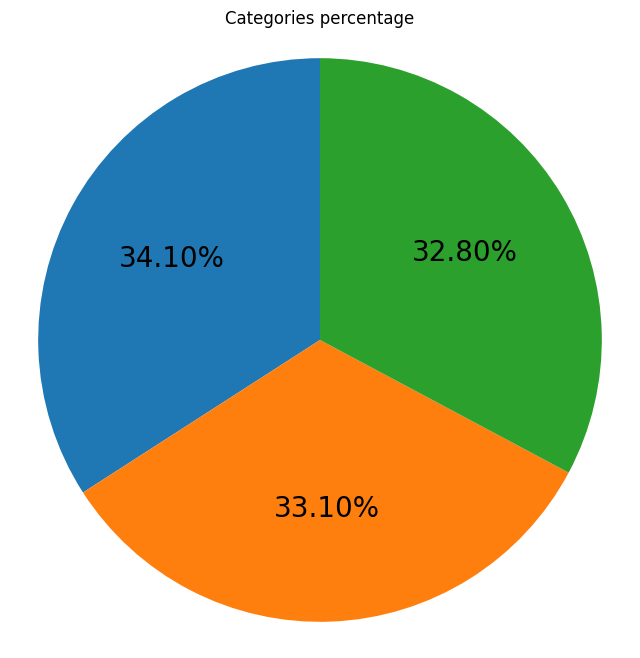

In [42]:
#Category Sales percentage
labels = data_cleaned['Category'].unique()
plt.figure(figsize=(8,8))
plt.pie(formatted_percentages,autopct='%1.2f%%', startangle = 90,textprops={'fontsize': 20})
plt.title('Categories percentage')
plt.axis('equal')
plt.show()

In [56]:
data_cleaned['Order Date']=pd.to_datetime(data_cleaned['Order Date'],format='%d-%m-%Y')
trend = data_cleaned.groupby(data_cleaned['Order Date'].dt.to_period('M')).sum(numeric_only = True)
trend = trend.reset_index()
trend['Order Date'] = trend['Order Date'].dt.to_timestamp()

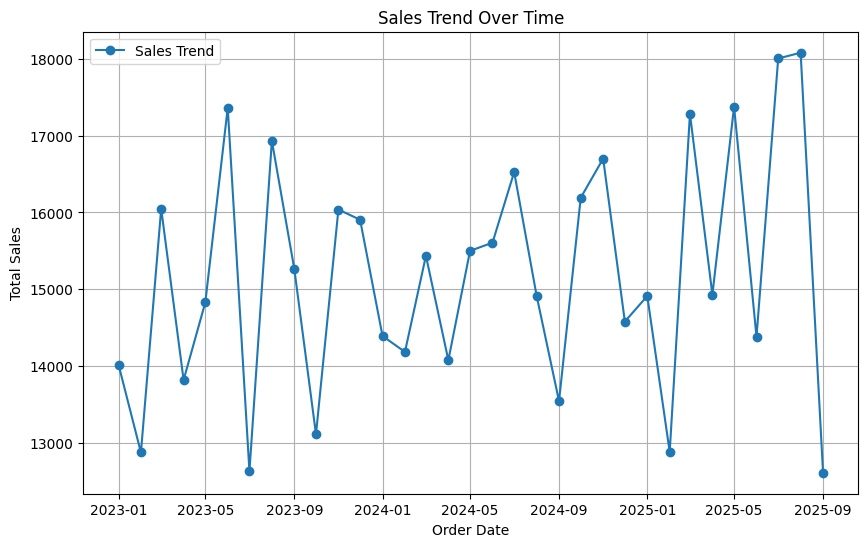

In [58]:
#trend on sales over time period
plt.figure(figsize=(10, 6))
plt.plot(trend['Order Date'], trend['Sales'], marker='o', linestyle='-', label='Sales Trend')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

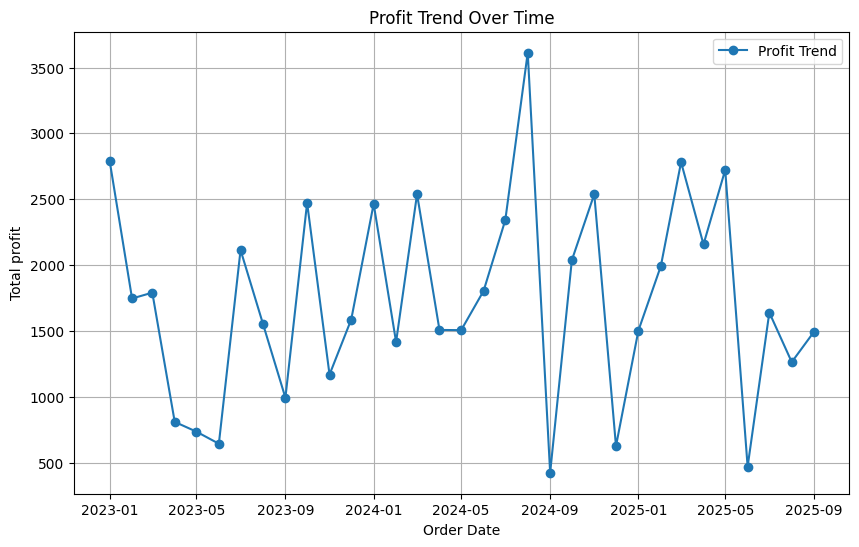

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(trend['Order Date'], trend['Profit'], marker='o', linestyle='-', label='Profit Trend')
plt.title('Profit Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total profit')
plt.legend()
plt.grid(True)
plt.show()

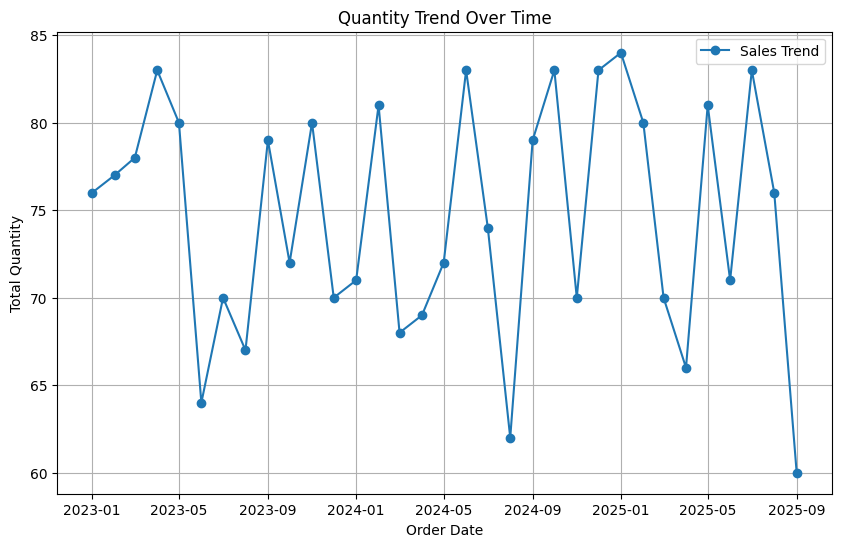

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(trend['Order Date'], trend['Quantity'], marker='o', linestyle='-', label='Sales Trend')
plt.title('Quantity Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()

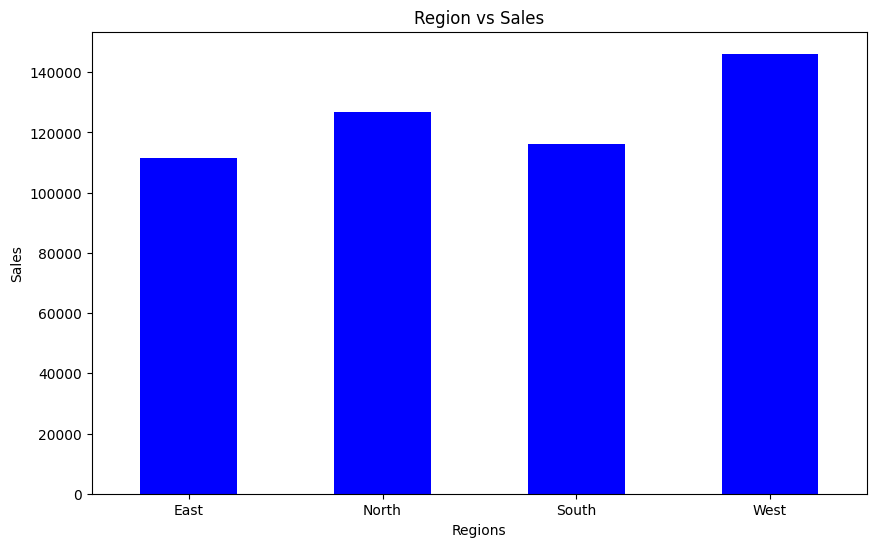

In [86]:
Sales_Regions.plot(kind = 'bar', color = 'blue', figsize=(10,6))
plt.title('Region vs Sales')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.xticks(rotation = 0)
plt.show()


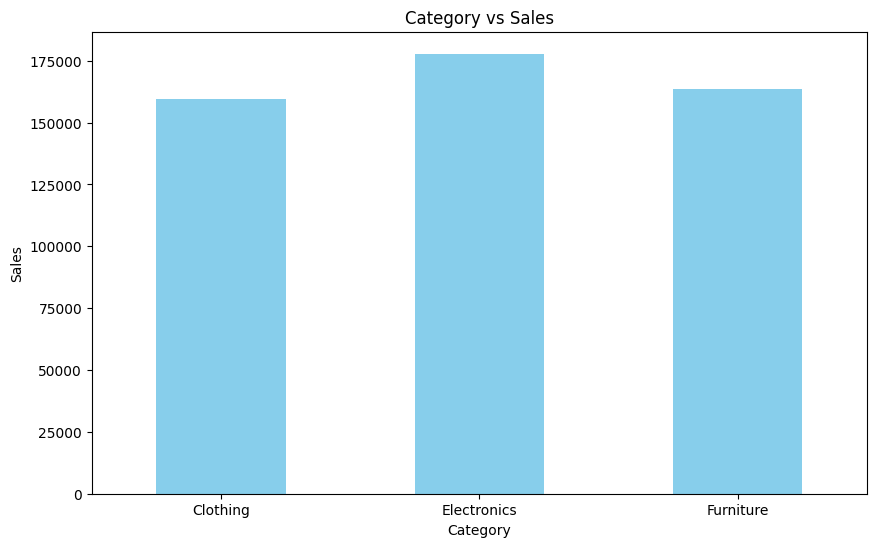

In [88]:
Sales_categories.plot(kind = 'bar', color = 'skyblue', figsize=(10,6))
plt.title('Category vs Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation = 0)
plt.show()

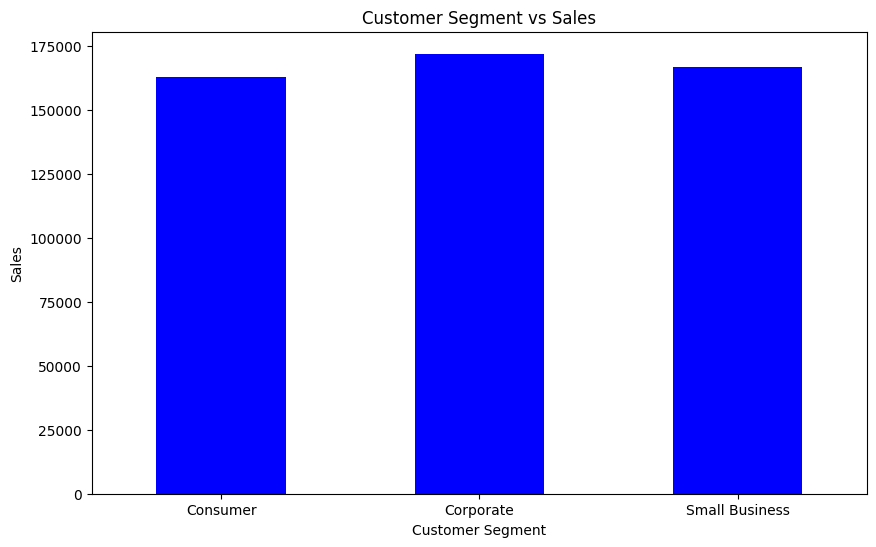

In [92]:
Sales_Customer_segments.plot(kind = 'bar', color = 'blue', figsize=(10,6))
plt.title('Customer Segment vs Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation = 0)
plt.show()

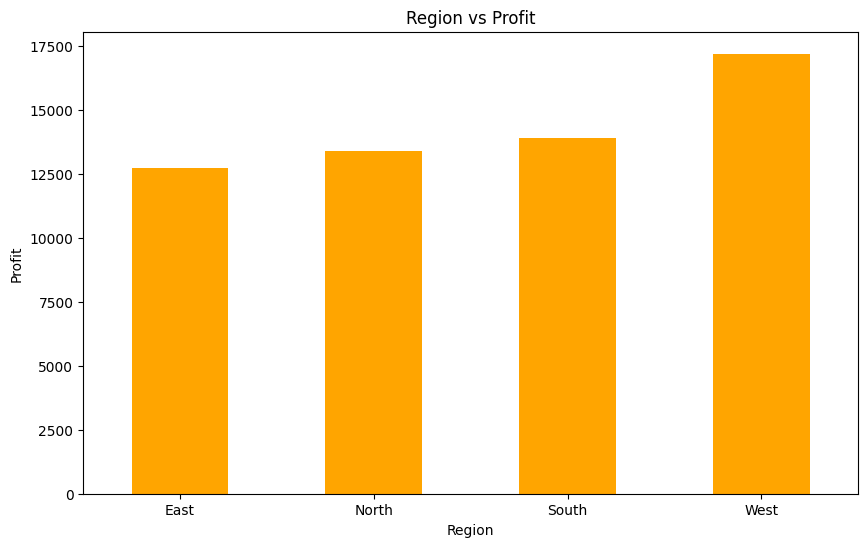

In [121]:
Profit_Regions.plot(kind = 'bar', color = 'orange', figsize=(10,6))
plt.title('Region vs Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation = 0)
plt.show()

In [24]:
#Region Sales-Profit
Region_Sales_Profit = data_cleaned.groupby('Region')[['Sales','Profit']].sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\1337924386.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_sales_profit = Region_Sales_Profit['Sales'][i] + Region_Sales_Profit['Profit'][i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\1337924386.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.2, Region_Sales_Profit['Sales'][i] + 1000, str(Region_Sales_Profit['Sales'][i]), color='black')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\1337924386.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

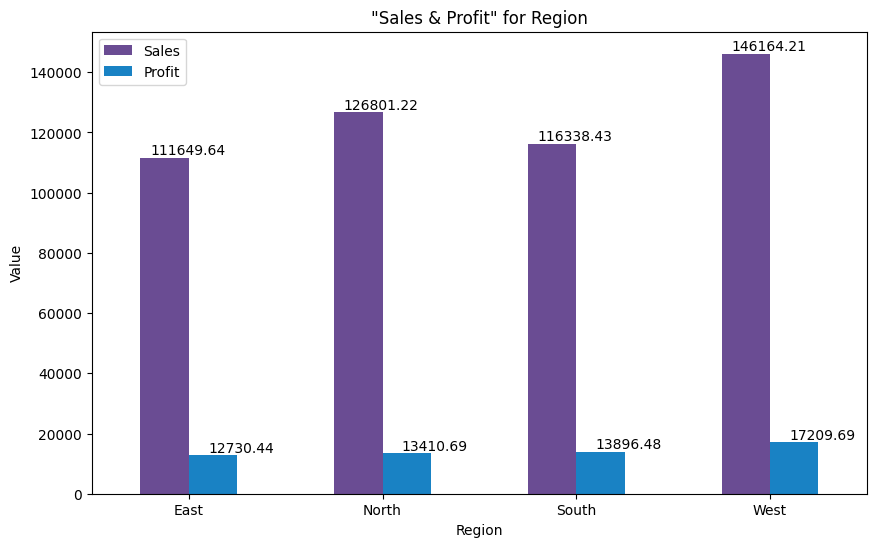

In [28]:
Region_Sales_Profit.plot(kind = 'bar', color = ['#6a4c93','#1982c4'], figsize=(10,6))
plt.title('"Sales & Profit" for Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation = 0)
for i in range(len(Region_Sales_Profit)): 
    total_sales_profit = Region_Sales_Profit['Sales'][i] + Region_Sales_Profit['Profit'][i] 
    plt.text(i - 0.2, Region_Sales_Profit['Sales'][i] + 1000, str(Region_Sales_Profit['Sales'][i]), color='black') 
    plt.text(i + 0.1, Region_Sales_Profit['Profit'][i] + 1000, str(Region_Sales_Profit['Profit'][i]), color='black') 
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\2616954029.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_sales_profit = Category_Sales_Profit['Sales'][i] + Category_Sales_Profit['Profit'][i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\2616954029.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.2, Category_Sales_Profit['Sales'][i] + 1000, str(Category_Sales_Profit['Sales'][i]), color='black')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\2616954029.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

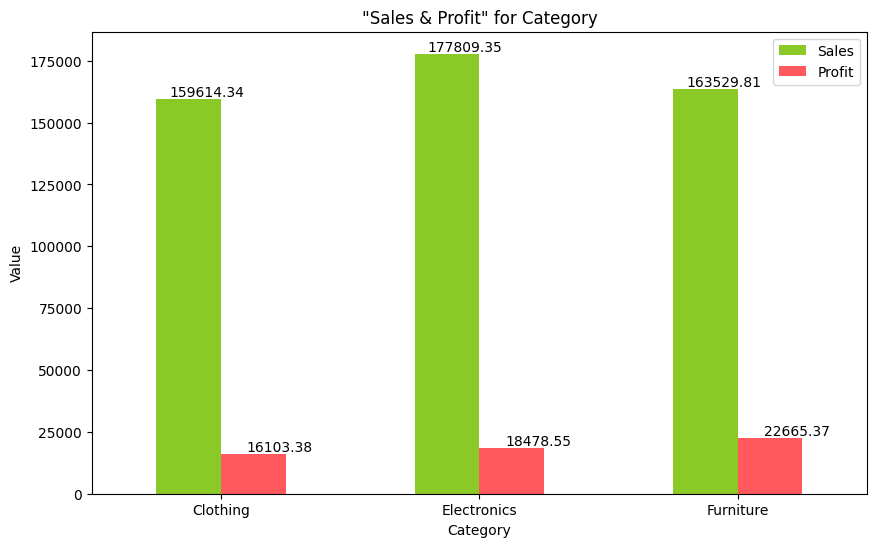

In [32]:
#Category Sales-Profit
Category_Sales_Profit = data_cleaned.groupby('Category')[['Sales','Profit']].sum()
Category_Sales_Profit.plot(kind = 'bar', color = ['#8ac926','#ff595e'], figsize=(10,6))
plt.title('"Sales & Profit" for Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation = 0)
for i in range(len(Category_Sales_Profit)): 
    total_sales_profit = Category_Sales_Profit['Sales'][i] + Category_Sales_Profit['Profit'][i] 
    plt.text(i - 0.2, Category_Sales_Profit['Sales'][i] + 1000, str(Category_Sales_Profit['Sales'][i]), color='black') 
    plt.text(i + 0.1, Category_Sales_Profit['Profit'][i] + 1000, str(Category_Sales_Profit['Profit'][i]), color='black')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\3641999714.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_sales_profit = CS_Sales_Profit['Sales'][i] + CS_Sales_Profit['Profit'][i]
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\3641999714.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.2, CS_Sales_Profit['Sales'][i] + 1000, str(CS_Sales_Profit['Sales'][i]), color='black')
C:\Users\Dell\AppData\Local\Temp\ipykernel_3964\3641999714.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

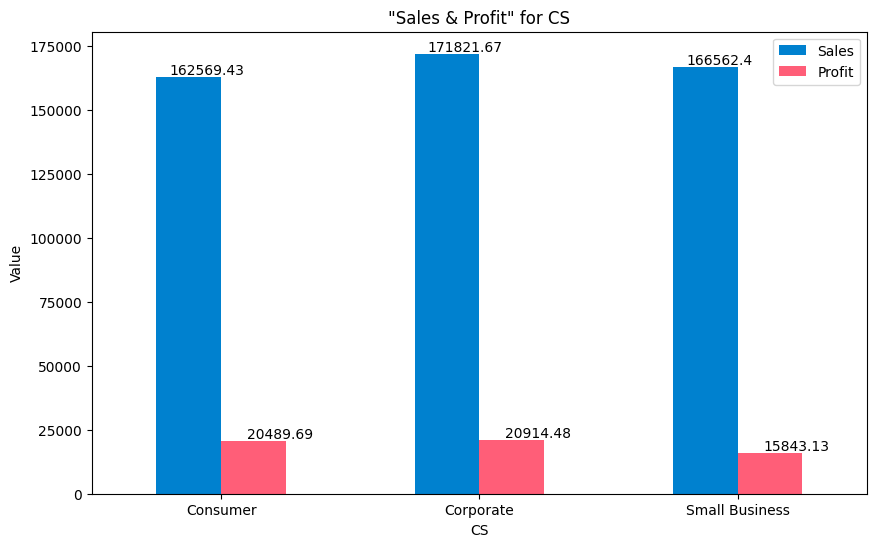

In [34]:
#customer_Segment Sales-Profit
CS_Sales_Profit = data_cleaned.groupby('Customer Segment')[['Sales','Profit']].sum()
CS_Sales_Profit.plot(kind = 'bar', color = ['#0081cf','#ff5e78'], figsize=(10,6))
plt.title('"Sales & Profit" for CS')
plt.xlabel('CS')
plt.ylabel('Value')
plt.xticks(rotation = 0)
for i in range(len(CS_Sales_Profit)): 
    total_sales_profit = CS_Sales_Profit['Sales'][i] + CS_Sales_Profit['Profit'][i] 
    plt.text(i - 0.2, CS_Sales_Profit['Sales'][i] + 1000, str(CS_Sales_Profit['Sales'][i]), color='black') 
    plt.text(i + 0.1, CS_Sales_Profit['Profit'][i] + 1000, str(CS_Sales_Profit['Profit'][i]), color='black')
plt.show()

In [44]:
Region_percentages = data_cleaned['Region'].value_counts(normalize=True) * 100
formatted_percentages_Region = Region_percentages.apply(lambda x: f"{x:.2f}")
print(formatted_percentages_Region)
formatted_percentages_Region = formatted_percentages_Region.astype(float)

Region
West     28.00
North    25.80
East     23.20
South    23.00
Name: proportion, dtype: object


In [48]:
cs_percentages = data_cleaned['Customer Segment'].value_counts(normalize=True) * 100
formatted_percentages_cs = cs_percentages.apply(lambda x: f"{x:.2f}")
print(formatted_percentages_cs)
formatted_percentages_cs = formatted_percentages_cs.astype(float)

Customer Segment
Corporate         33.70
Consumer          33.40
Small Business    32.90
Name: proportion, dtype: object


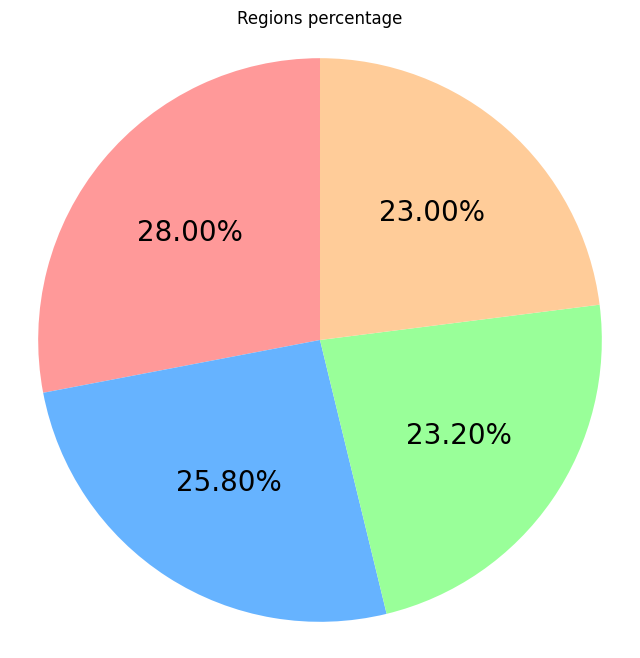

In [46]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(8,8))
plt.pie(formatted_percentages_Region,autopct='%1.2f%%', startangle = 90, colors = colors,textprops={'fontsize': 20})
plt.title('Regions percentage')
plt.axis('equal')
plt.show()

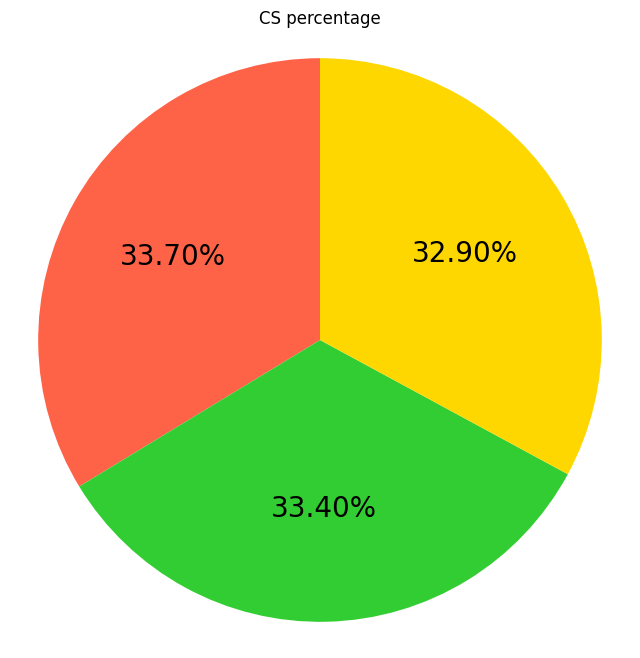

In [50]:
colors = ['#FF6347', '#32CD32', '#FFD700']
plt.figure(figsize=(8,8))
plt.pie(formatted_percentages_cs,autopct='%1.2f%%', startangle = 90, colors = colors,textprops={'fontsize': 20})
plt.title('CS percentage')
plt.axis('equal')
plt.show()

In [2]:
import seaborn as sns

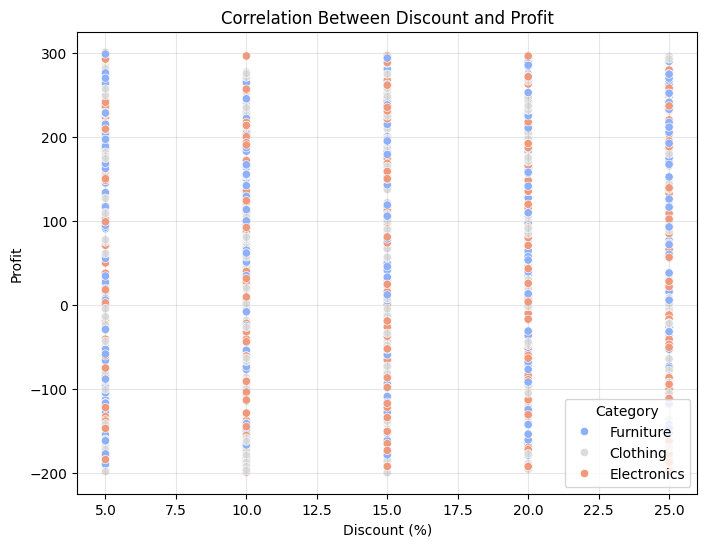

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=data_cleaned, hue='Category', palette='coolwarm')
plt.title("Correlation Between Discount and Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.grid(alpha=0.3)
plt.show()